<a href="https://colab.research.google.com/github/hafizaaja/Home_Credit_Final_Project/blob/main/Home_Credit_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset Data Training

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/application_train.csv")
pd.set_option('display.max_columns',None)
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
89124,203483,0,Cash loans,F,Y,N,0,180000.0,942300.0,27679.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.072508,-16785,-1873,-10668.0,-313,0.0,1,1,0,1,0,0,Accountants,2.0,1,1,WEDNESDAY,13,0,0,0,0,0,0,Bank,0.869175,0.667030,0.297087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1518.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,2.0
201531,333614,0,Cash loans,M,N,Y,0,337500.0,862560.0,25348.5,720000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006233,-20536,365243,-13055.0,-4088,NaN,1,0,0,1,0,0,NaN,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,XNA,0.916254,0.705530,0.508287,0.0495,0.0479,0.9727,0.6260,0.0041,0.00,0.1034,0.125,0.0417,0.0370,0.0403,0.0398,0.0,0.0000,0.0504,0.0497,0.9727,0.6406,0.0041,0.0000,0.1034,0.125,0.0417,0.0378,0.0441,0.0414,0.0,0.0000,0.0500,0.0479,0.9727,0.6310,0.0041,0.00,0.1034,0.125,0.0417,0.0376,0.041,0.0405,0.0,0.0000,reg oper account,block of flats,0.0335,Block,No,0.0,0.0,0.0,0.0,-276.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
47654,155199,0,Cash loans,F,Y,Y,1,90000.0,463500.0,15079.5,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018209,-10676,-1110,-940.0,-2309,23.0,1,1,0,1,0,0,Medicine staff,3.0,3,3,MONDAY,9,0,0,0,0,0,0,Medicine,0.153075,0.750213,0.349055,0.2165,0.1691,0.9985,0.9796,NaN,0.16,0.1379,0.375,NaN,0.1008,NaN,0.2231,NaN,0.0101,0.2206,0.1755,0.9985,0.9804,NaN,0.1611,0.1379,0.375,NaN,0.1031,NaN,0.2325,NaN,0.0107,0.2186,0.1691,0.9985,0.9799,NaN,0.16,0.1379,0.375,NaN,0.1026,NaN,0.2271,NaN,0.0103,NaN,block of flats,0.20

# Exploring Data

In [4]:
df_train = df.copy()

In [5]:
df_train.shape

(307511, 122)

In [6]:
df_train.SK_ID_CURR.nunique()

307511

In [8]:
df_train.duplicated().sum()

0

In [9]:
cols_to_drop = [
    # unique id
    'SK_ID_CURR'
]

In [10]:
df_train = df_train.drop(cols_to_drop, axis=1)

# Cleaning, Preprocessing

In [11]:
df_train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.14921

In [12]:
df_train.loc[df_train['DAYS_BIRTH']<0, 'DAYS_BIRTH'] = df_train['DAYS_BIRTH'].max()
df_train.loc[df_train['DAYS_EMPLOYED']<0, 'DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].max()
df_train.loc[df_train['DAYS_REGISTRATION']<0, 'DAYS_REGISTRATION'] = df_train['DAYS_REGISTRATION'].max()
df_train.loc[df_train['DAYS_ID_PUBLISH']<0, 'DAYS_ID_PUBLISH'] = df_train['DAYS_ID_PUBLISH'].max()
df_train.loc[df_train['DAYS_LAST_PHONE_CHANGE']<0, 'DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].max()

# Exploratory Data Analysis

### Correlation Check

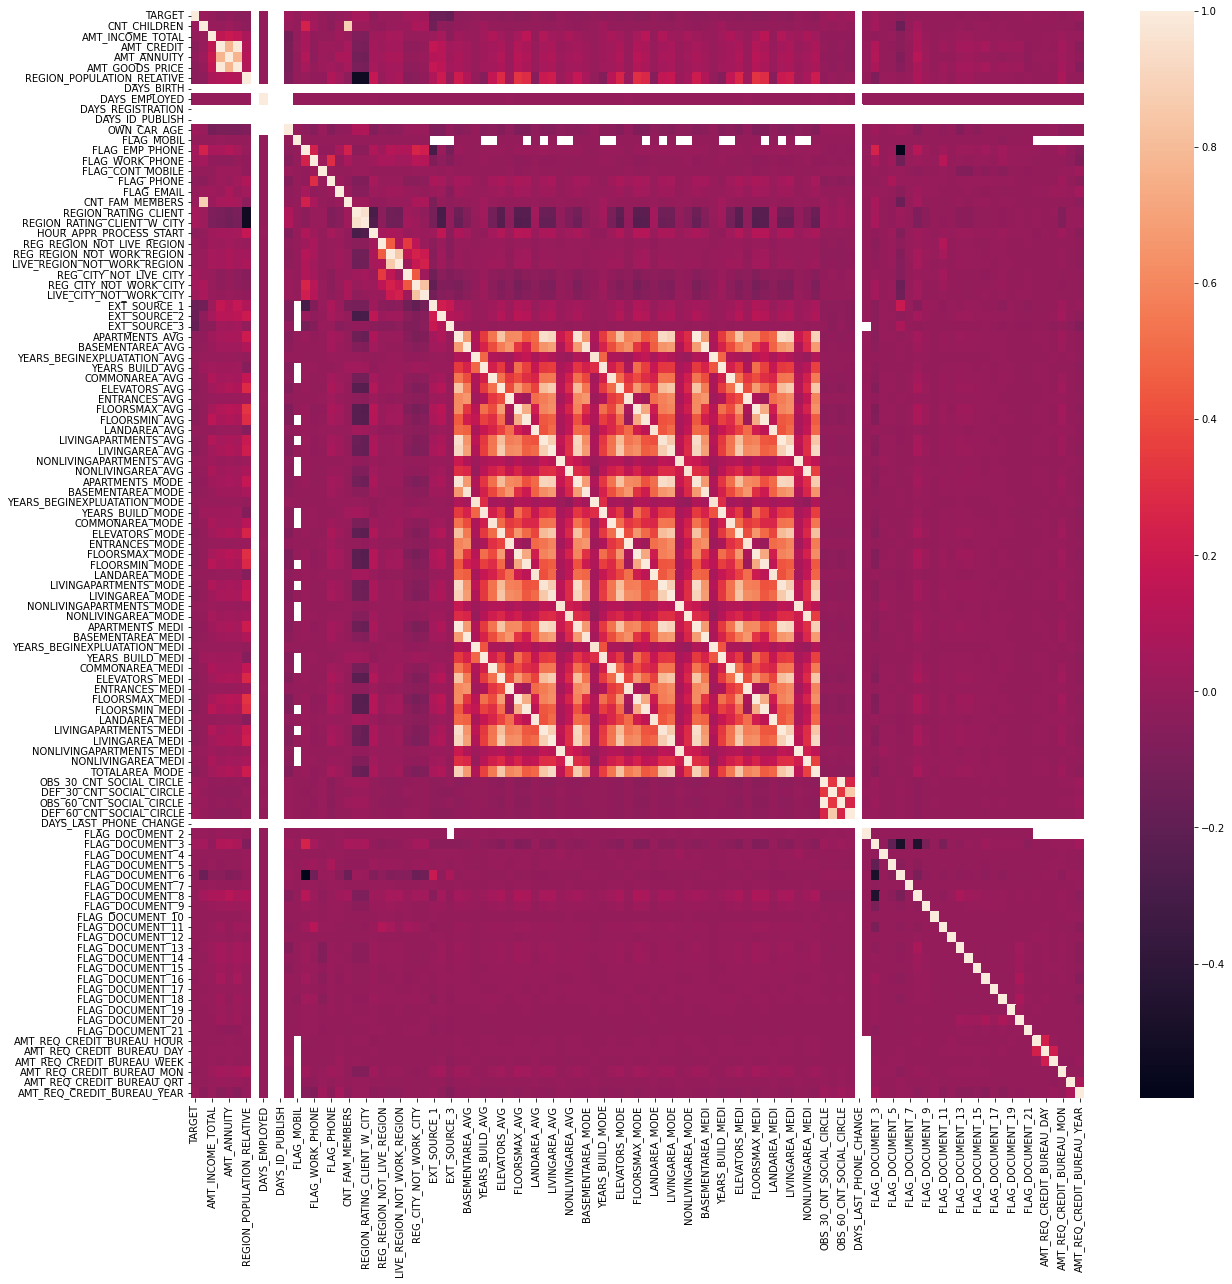

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr())

In [14]:
corr_matrix = df_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [15]:
to_drop_hicorr

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [16]:
df_train.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [17]:
df_train.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [20]:
for col in df_train.select_dtypes(include='object').columns.tolist():
    print(df_train[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64


F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64


N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64


Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64


Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                

In [21]:
df_train.drop('EMERGENCYSTATE_MODE', axis=1, inplace=True)

# Handle Missing Values

### Missing Value Checking

In [22]:
check_missing = df_train.isnull().sum() * 100 / df_train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

COMMONAREA_AVG                 69.872297
NONLIVINGAPARTMENTS_AVG        69.432963
FONDKAPREMONT_MODE             68.386172
YEARS_BUILD_AVG                66.497784
OWN_CAR_AGE                    65.990810
LANDAREA_AVG                   59.376738
BASEMENTAREA_AVG               58.515956
EXT_SOURCE_1                   56.381073
NONLIVINGAREA_AVG              55.179164
WALLSMATERIAL_MODE             50.840783
APARTMENTS_AVG                 50.749729
ENTRANCES_AVG                  50.348768
HOUSETYPE_MODE                 50.176091
FLOORSMAX_AVG                  49.760822
YEARS_BEGINEXPLUATATION_AVG    48.781019
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_30_CNT_SOCIA

### Mising Values Filling

In [25]:
df_train['COMMONAREA_AVG'].fillna(0, inplace=True)                 
df_train['NONLIVINGAPARTMENTS_AVG'].fillna(0, inplace=True)
df_train['FONDKAPREMONT_MODE'].fillna(0, inplace=True)
df_train['YEARS_BUILD_AVG'].fillna(0, inplace=True)
df_train['OWN_CAR_AGE'].fillna(0, inplace=True)
df_train['LANDAREA_AVG'].fillna(0, inplace=True)
df_train['BASEMENTAREA_AVG'].fillna(0, inplace=True)
df_train['EXT_SOURCE_1'].fillna(0, inplace=True)
df_train['NONLIVINGAREA_AVG'].fillna(0, inplace=True)
df_train['WALLSMATERIAL_MODE'].fillna(0, inplace=True)
df_train['APARTMENTS_AVG'].fillna(0, inplace=True)
df_train['ENTRANCES_AVG'].fillna(0, inplace=True)
df_train['HOUSETYPE_MODE'].fillna(0, inplace=True)
df_train['FLOORSMAX_AVG'].fillna(0, inplace=True)
df_train['YEARS_BEGINEXPLUATATION_AVG'].fillna(0, inplace=True)
df_train['OCCUPATION_TYPE'].fillna(0, inplace=True)
df_train['EXT_SOURCE_3'].fillna(0, inplace=True)
df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
df_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
df_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
df_train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)
df_train['NAME_TYPE_SUITE'].fillna(0, inplace=True)
df_train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
df_train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
df_train['EXT_SOURCE_2'].fillna(0, inplace=True)
df_train['DAYS_LAST_PHONE_CHANGE'].fillna(0, inplace=True)

# Feature Scaling and Tranformation


### One Hot Encoding

In [26]:
categorical_cols = [col for col in df_train.select_dtypes(include='object').columns.tolist()]

In [27]:
onehot = pd.get_dummies(df_train[categorical_cols], drop_first=True)

In [28]:
onehot.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,

In [29]:
numerical_cols = [col for col in df_train.columns.tolist() if col not in categorical_cols + ['TARGET']]

### Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df_train[numerical_cols]), columns=numerical_cols)

In [31]:
std.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.577538,0.142129,-0.478095,-0.149452,0.0,0.00255,0.0,0.0,-0.455284,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-0.103064,-0.631821,-0.124004,-0.231267,-0.291208,-0.547236,-0.476522,-1.301593,-1.007542,-0.345180,0.003066,0.960978,1.016443,0.018432,-0.051932,-0.198993,0.162782,-0.100846,-0.261343,0.242861,4.163504,0.0,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.346719
1,-0.577538,0.426792,1.725450,-1.252750,0.0,0.00255,0.0,0.0,-0.455284,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-2.067573,-0.325620,-0.124004,-0.231267,-0.291208,-0.547236,0.323239,0.566501,-1.527258,0.396431,0.236003,0.987275,1.505968,1.012286,-0.387436,1.165958,-0.228092,0.045223,-0.059838,-0.174085,-0.320480,0.0,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565
2,-0.577538,-0.427196,-1.152888,-0.783451,0.0,0.00255,0.0,0.0,2.430559,0.001803,0.468697,2.003956,0.043245,1.599337,-0.245215,-0.103064,-0.938022,-0.124004,-0.231267,-0.291208,-0.547236,-0.767499,0.221612,1.193214,-0.602452,-0.534146,-1.020852,-0.698001,-0.289190,-0.722940,-0.744581,-0.440702,-0.100846,-0.261343,-0.591031,-0.320480,0.0,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565
3,-0.577538,-0.142533,-0.711430,-0.928991,0.0,0.00255,0.0,0.0,-0.455284,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,1.511587,-0.124004,-0.231267,-0.291208,-0.547236,-0.767499,0.713100,-1.527258,-0.602452,-0.534146,-1.020852,-0.698001,-0.289190,-0.722940,-0.744581,-0.440702,-0.100846,-0.261343,0.242861,-0.320480,0.0,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565
4,-0.577538,-0.199466,-0.213734,0.563570,0.0,0.00255,0.0,0.0,-0.455284,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.325620,-0.124004,-0.231267,-0.291208,1.827367,-0.767499,-0.990729,-1.527258,-0.602452,-0.534146,-1.020852,-0.698001,-0.289190,-0.722940,-0.744581,-0.440702,-0.100846,-0.261343,-0.591031,-0.320480,0.0,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,3.359858,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100

In [32]:
data_model = pd.concat([onehot, std, df_train[['TARGET']]], axis=1)

# Load Dataset Data Test

In [69]:
# Import dataset of data test
df2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/application_test.csv")
pd.set_option('display.max_columns',None)
df2.sample(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
25773,287605,Cash loans,F,N,N,0,261000.0,349258.5,27724.5,301500.0,Children,Pensioner,Secondary / secondary special,Widow,Municipal apartment,0.010032,-22269,365243,-11755.0,-4946,NaN,1,0,0,1,0,0,NaN,1.0,2,2,FRIDAY,9,0,0,0,0,0,0,XNA,NaN,0.217887,0.529890,NaN,NaN,0.9742,NaN,NaN,NaN,0.1034,0.1667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9742,NaN,NaN,NaN,0.1034,0.1667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9742,NaN,NaN,NaN,0.1034,0.1667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,block of flats,0.0510,"Stone, brick",No,1.0,0.0,1.0,0.0,-2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
27034,297093,Cash loans,F,Y,Y,2,99000.0,450000.0,22977.0,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.014520,-13209,-2939,-1091.0,-2098,25.0,1,1,0,1,0,0,NaN,4.0,2,2,THURSDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.376211,0.218055,0.389339,0.1771,0.0635,0.9940,0.8640,0.253,0.16,0.1724,0.3125,0.3125,0.0585,0.1484,0.1533,0.0039,0.0234,0.0609,0.0000,0.9846,0.7975,0.0279,0.0,0.0690,0.3750,0.2083,0.0,0.0533,0.0543,0.0,0.0,0.1728,0.0357,0.9965,0.8658,0.2547,0.16,0.1724,0.3542,0.3125,0.0309,0.1509,0.1384,0.0039,0.026,reg oper spec account,block of flats,0.1606,"Stone, brick",No,3.0,0.0,3.0,0.0,-592.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
39552,391357,Cash loans,M,N,Y,1,143100.0,534204.0,41472.0,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.019689,-16176,-219,-1579.0,-4569,NaN,1,1,0,1,1,1,Laborers,3.0,2,2,MONDAY,10,0,1,1,0,1,1,Construction,0.375539,0.617712,0.747663,0.1031,0.0920,0.9831,0.7688,0.014,0.00,0.2069,0.1667,0.0417,0.0000,0.0841,0.0904,0.0000,0.0000,0.1050,0.0955,0.9831,0.7779,0.0141,0.0,0.2069,0.1667,0.0417,0.0,0.0918,0.0942,0.0,0.0,0.1041,0.0920,0.9831,0.7719,0.0141,0.00,0.2069,0.1667,0.0417,0.0000,0.0855,0

# Exploring Data

In [34]:
df_test = df2.copy()

In [35]:
df_test.shape

(48744, 121)

In [36]:
df_test.SK_ID_CURR.nunique()

48744

In [38]:
df_test.duplicated().sum()

0

In [39]:
cols_to_drop2 = [
    # unique id
    'SK_ID_CURR'
]

In [40]:
df_test = df_test.drop(cols_to_drop2, axis=1)

# Cleaning, Preprocessing

In [41]:
df_test.loc[df_test['DAYS_BIRTH']<0, 'DAYS_BIRTH'] = df_test['DAYS_BIRTH'].max()
df_test.loc[df_test['DAYS_EMPLOYED']<0, 'DAYS_EMPLOYED'] = df_test['DAYS_EMPLOYED'].max()
df_test.loc[df_test['DAYS_REGISTRATION']<0, 'DAYS_REGISTRATION'] = df_test['DAYS_REGISTRATION'].max()
df_test.loc[df_test['DAYS_ID_PUBLISH']<0, 'DAYS_ID_PUBLISH'] = df_test['DAYS_ID_PUBLISH'].max()
df_test.loc[df_test['DAYS_LAST_PHONE_CHANGE']<0, 'DAYS_LAST_PHONE_CHANGE'] = df_test['DAYS_LAST_PHONE_CHANGE'].max()

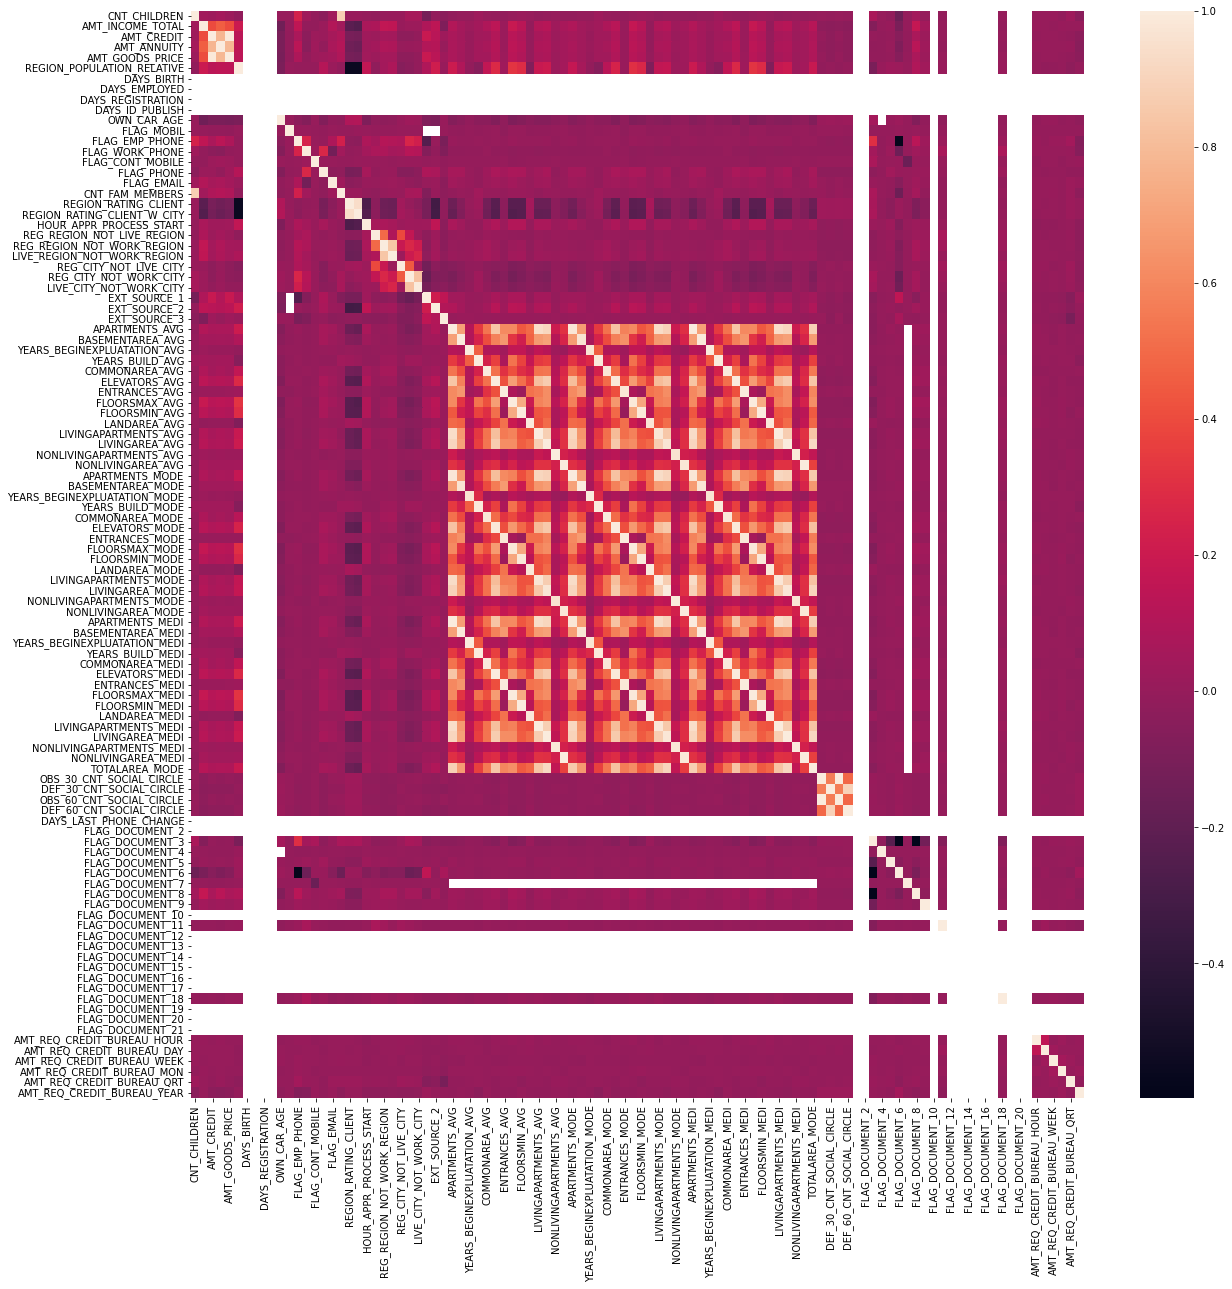

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(df_test.corr())

In [43]:
corr_matrix2 = df_test.corr().abs()
upper2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(np.bool))
to_drop_hicorr2 = [column for column in upper2.columns if any(upper2[column] > 0.7)]

In [44]:
to_drop_hicorr2

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [45]:
df_test.drop(to_drop_hicorr2, axis=1, inplace=True)

In [46]:
for col in df_test.select_dtypes(include='object').columns.tolist():
    print(df_test[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         99.099376
Revolving loans     0.900624
Name: NAME_CONTRACT_TYPE, dtype: float64


F    67.040046
M    32.959954
Name: CODE_GENDER, dtype: float64


N    66.287133
Y    33.712867
Name: FLAG_OWN_CAR, dtype: float64


Y    69.05055
N    30.94945
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      83.053540
Family             12.294859
Spouse, partner     3.027199
Children            0.852968
Other_B             0.441118
Other_A             0.227876
Group of people     0.102440
Name: NAME_TYPE_SUITE, dtype: float64


Working                 50.330297
Commercial associate    23.391597
Pensioner               19.023880
State servant            7.246020
Student                  0.004103
Businessman              0.002052
Unemployed               0.002052
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    69.727556
Higher education                 25.677006
Incomplete higher                 3.536846
Lower secondary                   0.974479
Acad

In [47]:
df_test.drop('EMERGENCYSTATE_MODE', axis=1, inplace=True)

# Handle Missing Values

In [49]:
df_test['COMMONAREA_AVG'].fillna(0, inplace=True)                 
df_test['NONLIVINGAPARTMENTS_AVG'].fillna(0, inplace=True)
df_test['FONDKAPREMONT_MODE'].fillna(0, inplace=True)
df_test['YEARS_BUILD_AVG'].fillna(0, inplace=True)
df_test['OWN_CAR_AGE'].fillna(0, inplace=True)
df_test['LANDAREA_AVG'].fillna(0, inplace=True)
df_test['BASEMENTAREA_AVG'].fillna(0, inplace=True)
df_test['EXT_SOURCE_1'].fillna(0, inplace=True)
df_test['NONLIVINGAREA_AVG'].fillna(0, inplace=True)
df_test['WALLSMATERIAL_MODE'].fillna(0, inplace=True)
df_test['APARTMENTS_AVG'].fillna(0, inplace=True)
df_test['ENTRANCES_AVG'].fillna(0, inplace=True)
df_test['HOUSETYPE_MODE'].fillna(0, inplace=True)
df_test['FLOORSMAX_AVG'].fillna(0, inplace=True)
df_test['YEARS_BEGINEXPLUATATION_AVG'].fillna(0, inplace=True)
df_test['OCCUPATION_TYPE'].fillna(0, inplace=True)
df_test['EXT_SOURCE_3'].fillna(0, inplace=True)
df_test['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
df_test['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
df_test['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
df_test['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
df_test['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
df_test['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)
df_test['NAME_TYPE_SUITE'].fillna(0, inplace=True)
df_test['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
df_test['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
df_test['EXT_SOURCE_2'].fillna(0, inplace=True)
df_test['DAYS_LAST_PHONE_CHANGE'].fillna(0, inplace=True)

# Feature Scaling and Transformation

### One Hot Encoding

In [50]:
categorical_cols2 = [col for col in df_test.select_dtypes(include='object').columns.tolist()]

In [51]:
onehot2 = pd.get_dummies(df_test[categorical_cols2], drop_first=True)

In [52]:
onehot2.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [53]:
numerical_cols2 = [col for col in df_test.columns.tolist() if col not in categorical_cols2]

In [54]:
ss2 = StandardScaler()
std2 = pd.DataFrame(ss.fit_transform(df_test[numerical_cols2]), columns=numerical_cols2)

### Standardization

In [55]:
std2.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.559988,-0.427809,0.142475,-0.164654,0.0,0.0,0.0,0.0,-0.457762,0.004529,0.484762,-0.507337,0.040035,-0.597571,2.268994,-0.073004,1.828060,-0.138545,-0.241633,-0.289777,-0.538296,1.581005,1.498038,-0.978896,0.035413,0.286713,0.925593,-0.716994,-0.290197,0.568106,0.019673,-0.451116,-0.105151,-0.266637,-0.401091,-0.279167,0.0,0.0,0.520828,-0.010129,-0.122358,-0.309618,-0.006406,-0.311524,-0.06718,0.0,-0.034216,0.0,0.0,0.0,0.0,0.0,0.0,-0.039517,0.0,0.0,0.0,-0.042538,-0.036585,-0.048265,-0.078421,-0.711321,-0.943796
1,-0.559988,-0.782413,-0.804537,1.009586,0.0,0.0,0.0,0.0,-0.457762,0.004529,0.484762,-0.507337,0.040035,-0.597571,-0.440724,-0.073004,-0.917400,-0.138545,-0.241633,-0.289777,-0.538296,0.939691,-1.247530,0.084753,-0.615934,-0.558775,-1.061394,-0.716994,-0.290197,-0.747631,-0.771614,-0.451116,-0.105151,-0.266637,-0.401091,-0.279167,0.0,0.0,0.520828,-0.010129,-0.122358,-0.309618,-0.006406,-0.311524,-0.06718,0.0,-0.034216,0.0,0.0,0.0,0.0,0.0,0.0,-0.039517,0.0,0.0,0.0,-0.042538,-0.036585,-0.048265,-0.078421,-0.711321,0.685697
2,-0.559988,0.237075,0.401002,-0.147258,0.0,0.0,0.0,0.0,0.118305,0.004529,0.484762,-0.507337,0.040035,-0.597571,-0.440724,-0.073004,0.607856,-0.138545,-0.241633,-0.289777,-0.538296,-0.991490,1.002580,0.777263,-0.615934,-0.558775,-1.061394,-0.716994,-0.290197,-0.747631,-0.771614,-0.451116,-0.105151,-0.266637,-0.401091,-0.279167,0.0,0.0,-1.920019,-0.010129,-0.122358,-0.309618,-0.006406,3.210026,-0.06718,0.0,-0.034216,0.0,0.0,0.0,0.0,0.0,0.0,-0.039517,0.0,0.0,0.0,-0.042538,-0.036585,-0.048265,-0.078421,0.773588,1.228861
3,2.260729,1.345214,2.896221,0.358078,0.0,0.0,0.0,0.0,-0.457762,0.004529,0.484762,-0.507337,0.040035,1.673441,-0.440724,-0.073004,-0.307298,-0.138545,-0.241633,-0.289777,-0.538296,0.805510,-0.045533,0.783926,2.396053,2.270027,0.974185,1.919777,1.979017,1.884797,1.602248,2.810288,1.286768,1.294756,-0.401091,-0.279167,0.0,0.0,0.520828,-0.010129,-0.122358,-0.309618,-0.006406,-0.311524,-0.06718,0.0,-0.034216,0.0,0.0,0.0,0.0,0.0,0.0,-0.039517,0.0,0.0,0.0,-0.042538,-0.036585,-0.048265,-0.078421,-0.711321,0.685697
4,0.850370,0.015447,0.297651,-0.775825,0.0,0.0,0.0,0.0,1.385654,0.004529,0.484762,1.971078,0.040035,-0.597571,-0.440724,-0.073004,-2.137605,-0.138545,-0.241633,-0.289777,1.857714,-0.300542,-0.508586,-1.599404,-0.615934,-0.558775,-1.061394,-0.716994,-0.290197,-0.747631,-0.771614,-0.451116,-0.105151,-0.266637,-0.401091,-0.279167,0.0,0.0,0.520828,-0.010129,-0.122358,-0.309618,-0.006406,-0.311524,-0.06718,0.0,-0.034216,0.0,0.0,0.0,0.0,0.0,0.0,-0.039517,0.0,0.0,0.0,-0.042538,-0.036585,-0.048265,-0.078421,-0.711321,-0.943796


In [56]:
df_test = pd.concat([onehot2, std2], axis=1)

# Modeling - Train

### Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = data_model.drop('TARGET', axis=1)
y = data_model['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train.shape, X_test.shape

((246008, 191), (61503, 191))

In [60]:
from sklearn.ensemble import RandomForestClassifier

### Training

In [61]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [62]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
150,EXT_SOURCE_2,0.231294
151,EXT_SOURCE_3,0.222412
149,EXT_SOURCE_1,0.065580
1,CODE_GENDER_M,0.042601
19,NAME_EDUCATION_TYPE_Higher education,0.041948
...,...,...
76,ORGANIZATION_TYPE_Industry: type 3,0.000000
132,DAYS_BIRTH,0.000000
66,ORGANIZATION_TYPE_Emergency,0.000000
90,ORGANIZATION_TYPE_Police,0.000000


### Validation

In [63]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

#### AUC

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

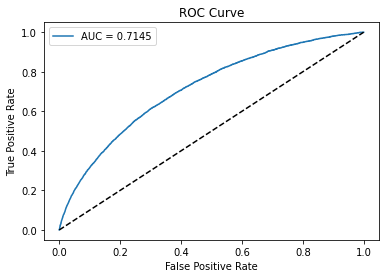

In [65]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [66]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [67]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,206125,0,0.036014,1,0,1,0.000016,0.0,0.000018
1,77787,0,0.037456,2,0,2,0.000033,0.0,0.000035
2,86857,0,0.038068,3,0,3,0.000049,0.0,0.000053
3,300079,0,0.038463,4,0,4,0.000065,0.0,0.000071
4,89587,0,0.038651,5,0,5,0.000081,0.0,0.000088


#### KS

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.3131')

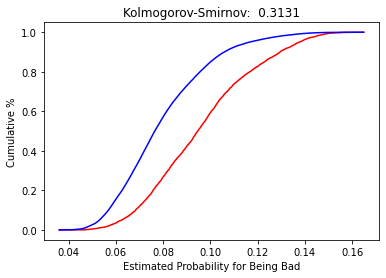

In [68]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)